In [1]:
import pyspark
from pyspark.sql.types import StructType, StructField,StringType,IntegerType
sc = pyspark.SparkContext("local","IDE")
spark = pyspark.sql.SparkSession.builder.appName("EDA").getOrCreate()

In [14]:
schema = StructType(
    [
        StructField("Name",StringType(),True),
        StructField("Age",IntegerType(),True),
        StructField("Salary",IntegerType(),True),
        StructField("Gender",StringType(),True),
        StructField("City",StringType(),True)
    ]
)

data = [
    ('Aljandro', 28, 13500000, 'M', 'Barranquilla'),
    ('Sara', 30, 4700000, 'F', 'Bogota'),
    ('Mauricio', 35, 13000000, 'M', 'Bogota'),
    ('Santiago', 32, 21000000, 'M', 'Barranquilla'),
    ('Andres', 33, 10000000, 'M', 'Medellin'),
    ('Jacob', 27, 7000000, 'M', 'Barranquilla'),
    ('Jairo', 65, 2000000, 'M', 'Bogota'),
    ('Carmen', 65, 1500000, 'F', 'Cali'),
    ('Sonia', 52, 4500000, 'F', 'Cali'),
    ('Emily', 28, 6000000, 'F', 'Barranquilla'),
    ('David', 35, 4000000, 'M', 'Barranquilla'),
    ('Sophia', 45, 7500000, 'F', 'Medellin'),
    ('Daniel', 31, 3000000, 'M', 'Medellin'),
    ('Olivia', 26, 5500000, 'F', 'Barranquilla'),
    ('Matthew', 50, 8500000, 'M', 'Bogota'),
    ('Emma', 33, 7000000, 'F', 'Barranquilla'),
    ('Andrew', 29, 4500000, 'M', 'Bogota'),
    ('Isabella', 39, 9000000, 'F', 'Cali'),
    ('John', 55, 5000000, 'M', 'Barranquilla'),
    ('Ava', 30, 6500000, 'F', 'Barranquilla'),
    ('James', 42, 8000000, 'M', 'Medellin'),
    ('Mia', 32, 5500000, 'F', 'Bogota'),
    ('Alexander', 38, 7500000, 'M', 'Cali'),
    ('Abigail', 27, 6000000, 'F', 'Cali'),
    ('William', 48, 8500000, 'M', 'Bogota'),
    ('Charlotte', 25, 7000000, 'F', 'Cali'),
    ('Michael', 41, 9500000, 'M', 'Barranquilla'),
    ('Harper', 29, 6500000, 'F', 'Barranquilla'),
    ('Ethan', 36, 8000000, 'M', 'Cali'),
    ('Evelyn', 34, 5500000, 'F', 'Barranquilla'),
    ('Ryan', 51, 9000000, 'M', 'Cali'),
    ('Amelia', 31, 7000000, 'F', 'Medellin'),
    ('Matthew', 37, 7500000, 'M', 'Medellin'),
    ('Elizabeth', 23, 6000000, 'F', 'Bogota'),
    ('Jacob', 49, 9500000, 'M', 'Medellin'),
    ('Samantha', 28, 6500000, 'F', 'Cali'),
    ('Benjamin', 43, 8000000, 'M', 'Medellin'),
    ('Lily', 35, 5500000, 'F', 'Barranquilla'),
    ('Henry', 52, 9000000, 'M', 'Medellin'),
    ('Chloe', 33, 7000000, 'F', 'Bogota'),
    ('Lucas', 40, 7500000, 'M', 'Bogota'),
    ('Grace', 24, 6000000, 'F', 'Medellin'),
    ('Gabriel', 47, 9500000, 'M', 'Cali'),
    ('Madison', 30, 6500000, 'F', 'Barranquilla'),
    ('Carter', 39, 8000000, 'M', 'Bogota'),
    ('Avery', 26, 5500000, 'F', 'Barranquilla'),
    ('Owen', 53, 9000000, 'M', 'Medellin'),
    ('Victoria', 32, 7000000, 'F', 'Barranquilla'),
    ('Jackson', 44, 8500000, 'M', 'Barranquilla'),
    ('Penelope', 29, 6500000, 'F', 'Medellin'),
    ('Sebastian', 45, 9000000, 'M', 'Barranquilla'),
]

dataframe_1 = spark.createDataFrame(
    schema = schema,
    data = data
)
dataframe_1.show(5)

+--------+---+--------+------+------------+
|    Name|Age|  Salary|Gender|        City|
+--------+---+--------+------+------------+
|Aljandro| 28|13500000|     M|Barranquilla|
|    Sara| 30| 4700000|     F|      Bogota|
|Mauricio| 35|13000000|     M|      Bogota|
|Santiago| 32|21000000|     M|Barranquilla|
|  Andres| 33|10000000|     M|    Medellin|
+--------+---+--------+------+------------+
only showing top 5 rows



In [23]:
# Summary Statistics
from pyspark.sql.functions import mean,median,stddev, col, count, max, min
#Using inbuilt describe function
summary_stats = dataframe_1.describe(["Age","Salary"])
summary_stats.show()
# Comparing Male vs Female and Accross Cities
m_vs_f = dataframe_1.groupby(["Gender","City"]).agg(
    count("Age").alias("Count"),
    mean("Age").alias("Avg_Age"),
    median("Age").alias("Median_Age"),
    min("Age").alias("Min_Age"),
    max("Age").alias("Max_Age"),
    mean("Salary").alias("Avg_Salary"),
    median("Salary").alias("Median_Salary"),
    min("Salary").alias("Min_Salary"),
    max("Salary").alias("Max_Salary"),   
).orderBy(["Gender","City"])
m_vs_f.show()

+-------+------------------+------------------+
|summary|               Age|            Salary|
+-------+------------------+------------------+
|  count|                51|                51|
|   mean|37.470588235294116| 7327450.980392157|
| stddev|10.333156228716318|2989386.4541990925|
|    min|                23|           1500000|
|    max|                65|          21000000|
+-------+------------------+------------------+

+------+------------+-----+------------------+----------+-------+-------+-----------------+-------------+----------+----------+
|Gender|        City|Count|           Avg_Age|Median_Age|Min_Age|Max_Age|       Avg_Salary|Median_Salary|Min_Salary|Max_Salary|
+------+------------+-----+------------------+----------+-------+-------+-----------------+-------------+----------+----------+
|     F|Barranquilla|   10|              30.3|      30.0|     26|     35|        6150000.0|    6250000.0|   5500000|   7000000|
|     F|      Bogota|    4|              29.5|      31.

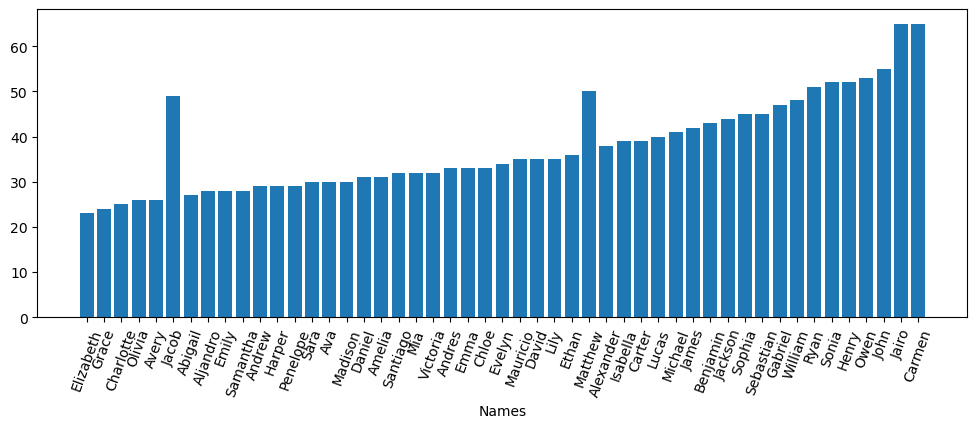

<Figure size 640x480 with 0 Axes>

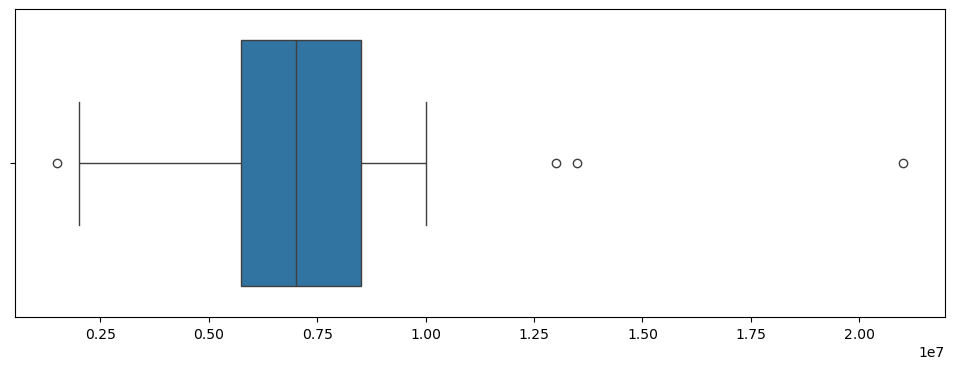

In [43]:
# Create Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Important to notice that you need to get the data using collect and the perform operations over the list that is your dataframe
__data = dataframe_1.orderBy("Age").collect() # This is what's being done 
plt.figure(figsize=(12, 4))  
#Bar Plot
barplot_1 = plt.bar(
    [row["Name"] for row in __data], # Here you make a list comprehension from the collected data
    [row["Age"] for row in __data]
)
plt.xlabel("Names")
plt.xticks(rotation = 70)
plt.show()
plt.clf()
# Box Plot
plt.figure(figsize=(12, 4))
sns.boxplot(x = [row["Salary"] for row in __data])
plt.show()

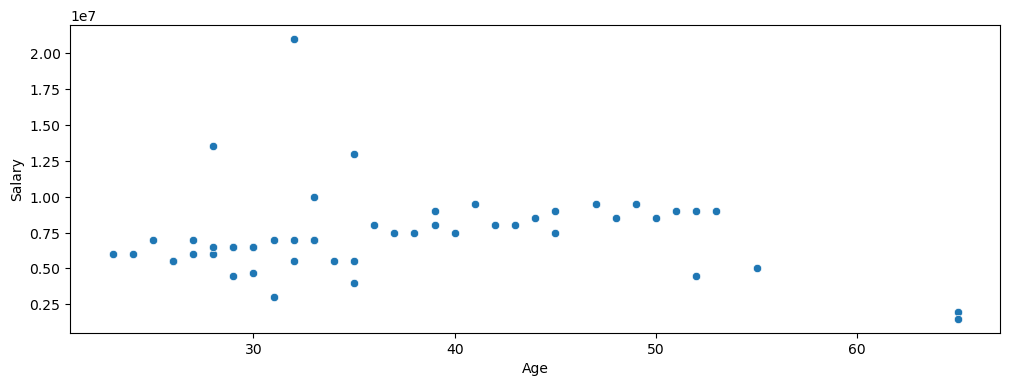

<Figure size 640x480 with 0 Axes>

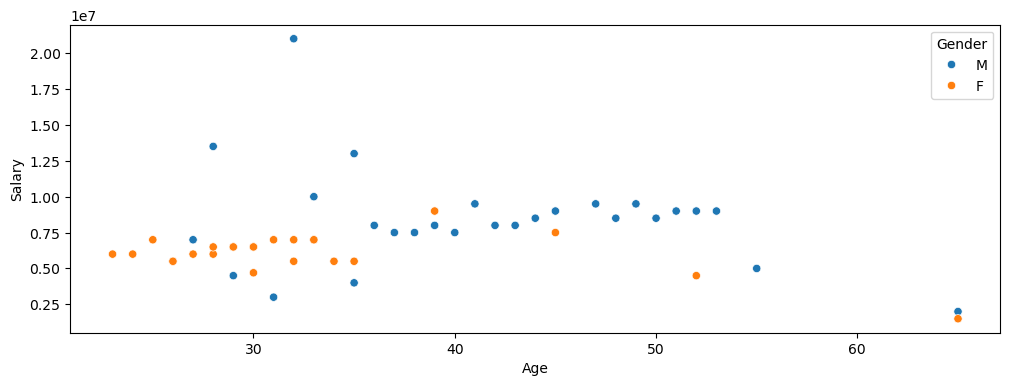

<Figure size 640x480 with 0 Axes>

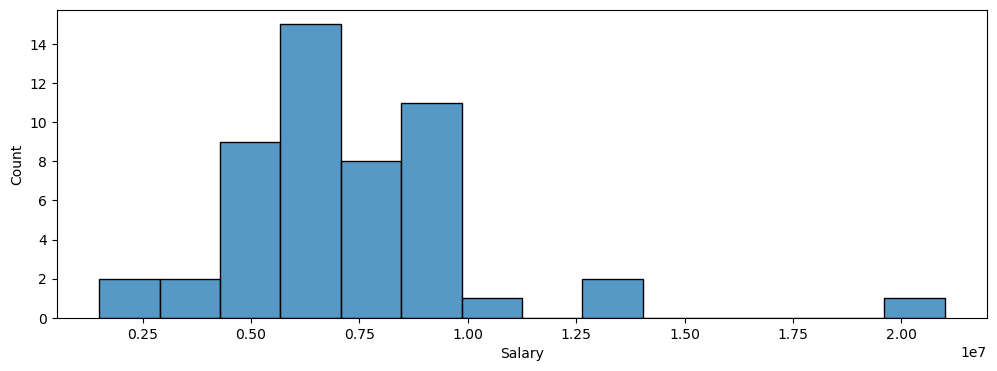

<Axes: xlabel='City', ylabel='Salary'>

<Figure size 640x480 with 0 Axes>

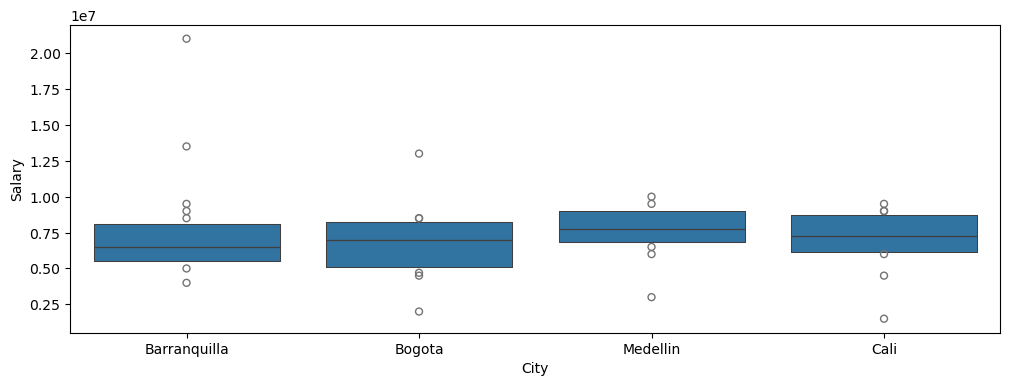

In [53]:
#Even though it's possible to create Visualizations using Pyspark Natively and the visualization library as shown 
# in the cell above, It's better to use the help of pandas.
import pandas as pd
pd_df = dataframe_1.toPandas() # Here We converted the Spark DF into a Pandas DF, Now we can use pandas code.

#Building a scatterPlot
plt.figure(figsize=(12, 4)) 
sns.scatterplot(x = pd_df["Age"] , y = pd_df["Salary"])
plt.show()
plt.clf()
# ---------------------
plt.figure(figsize=(12, 4)) 
sns.scatterplot(data = pd_df ,x ="Age" , y= "Salary", hue ="Gender" )
plt.show()
plt.clf()
# ---------------------
plt.figure(figsize=(12, 4))
sns.histplot(data = pd_df , x = "Salary")
plt.show()
plt.clf()
# ---------------------
plt.figure(figsize=(12, 4))
sns.boxenplot(pd_df,x = "City", y= "Salary")

